Using data from https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(color_codes=True)

In [2]:
df = pd.read_csv('input/train.tsv', sep='\t')

In [3]:
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
df['category_name'].value_counts().head(20)

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

In [5]:
df['sale_date'] = pd.to_datetime("'2018-10-20'".replace("'",""))
df['sale_date'] = df['sale_date'].apply(lambda x: x - pd.Timedelta(np.random.randint(1, 365), unit='D'))

category_median = {
    'Women/Jeans/Slim, Skinny': 13,
    'Women/Shoes/Boots': 3,
    'Women/Tops & Blouses/T-Shirts': 5,
    'Vintage & Collectibles/Housewares/Cup': 4
}
DEFAULT_MEDIAN = 10

not_in_list = ~df['category_name'].isin(category_median.keys())
df['list_date'] = df.loc[not_in_list]['sale_date'].apply(lambda x: x - pd.Timedelta(np.floor(np.abs(np.random.chisquare(DEFAULT_MEDIAN))), unit='D')) 

for key in list(category_median.keys()):
    index_filter = df['category_name'] == key
    df['list_date'].loc[index_filter] = df[index_filter]['sale_date'].apply(lambda x: x - pd.Timedelta(np.abs(np.random.chisquare(category_median[key])), unit='D')) #default for all
    
df['time_to_sale'] = df['sale_date'] - df['list_date']
df['time_to_sale'] = df['time_to_sale'].dt.days


C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sale_date,list_date,time_to_sale
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2018-02-21,2018-01-31,21
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,2018-06-13,2018-06-08,5
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2017-10-23,2017-10-18,5
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-06-16,2018-06-10,6
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,2018-08-19,2018-08-16,3


In [7]:
#pd.Series(np.random.random(len(df))) > 0.1

C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


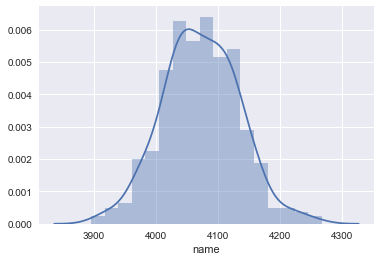

In [8]:
sns.distplot(df.set_index('sale_date').groupby(pd.TimeGrouper('D')).count().dropna()['name'])

C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


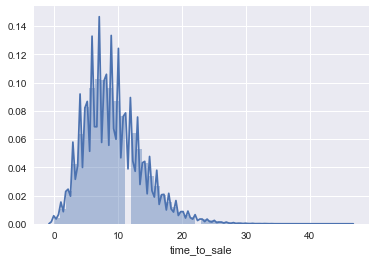

In [9]:
#mean time to sale across all cats
sns.distplot(df['time_to_sale'])

C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


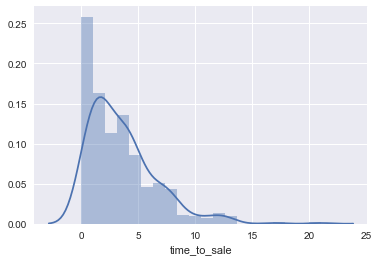

In [10]:
#mean time to sale across all cats
sns.distplot(df[df['category_name']=='Vintage & Collectibles/Housewares/Cup']['time_to_sale'])

In [11]:
sale_counts_week = df.set_index('sale_date').groupby(pd.TimeGrouper('W')).count().dropna()['name']
list_counts_week = df.set_index('list_date').groupby(pd.TimeGrouper('W')).count().dropna()['name']
weekly_counts = pd.merge(pd.DataFrame(sale_counts_week), pd.DataFrame(list_counts_week), left_index=True, right_index=True, how='inner')
weekly_counts.columns = ['sale_count', 'list_count']
weekly_counts

C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


,sale_count,list_count
2017-10-22,8173,27401
2017-10-29,28058,28316
2017-11-05,28419,28624
2017-11-12,28507,28465
2017-11-19,28472,28842
2017-11-26,28856,28299
2017-12-03,28111,28531
2017-12-10,28594,28385
2017-12-17,28561,28780
2017-12-24,28611,28384
